# Finding Significant CNVs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cptac

In [2]:
!pip install --upgrade cptac

Requirement already up-to-date: cptac in c:\users\chels\anaconda3\lib\site-packages (0.8.0)


## Download CNV Data

In [3]:
cptac.list_datasets()

Available datasets:

Dataset name                               Description     Data reuse status  \
                                                                               
Brca                                     breast cancer       no restrictions   
Ccrcc         clear cell renal cell carcinoma (kidney)       no restrictions   
Colon                                colorectal cancer       no restrictions   
Endometrial            endometrial carcinoma (uterine)       no restrictions   
Gbm                                       glioblastoma   publication embargo   
Hnscc                                    head and neck  password access only   
Lscc                      lung squamous cell carcinoma  password access only   
Luad                               lung adenocarcinoma   publication embargo   
Ovarian               high grade serous ovarian cancer       no restrictions   

Dataset name                              Publication link  
                                     

In [4]:
cptac.download(dataset="endometrial")

True

In [5]:
cptac.download(dataset="brca")

True

In [6]:
cptac.download(dataset="ccrcc")

True

In [7]:
cptac.download(dataset="gbm")

True

In [8]:
cptac.download(dataset="hnscc")

True

In [9]:
cptac.download(dataset="luad")

True

In [10]:
cptac.download(dataset="ovarian")

True

In [11]:
cptac.download(dataset="colon")

True

In [12]:
cptac.download(dataset="lscc")

True

In [13]:
en = cptac.Endometrial()
brca = cptac.Brca()
ccrcc = cptac.Ccrcc()
gbm = cptac.Gbm()
hnscc = cptac.Hnscc()
luad = cptac.Luad()
ovarian = cptac.Ovarian()
colon = cptac.Colon()
lscc = cptac.Lscc()

cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (C:\Users\chels\Anaconda3\lib\site-packages\ipykernel_launcher.py, line 4)


cptac warning: The HNSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (C:\Users\chels\Anaconda3\lib\site-packages\ipykernel_launcher.py, line 5)


cptac warning: The LUAD dataset is under publication embargo until July 01, 2020. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (C:\Users\chels\Anaconda3\lib\site-packages\ipykernel_launcher.py, line 6)


cptac warning: The LSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (C:\Users\chels\Anaconda3\lib\site-packages\ipykernel_launcher.py, line 9)


In [14]:
en_cnv = en.get_CNV()
brca_cnv = brca.get_CNV()
ccrcc_cnv = ccrcc.get_CNV()
gbm_cnv = gbm.get_CNV()
hnscc_cnv = hnscc.get_CNV()
luad_cnv = luad.get_CNV()
ovarian_cnv = ovarian.get_CNV()
colon_cnv = colon.get_CNV()
lscc_cnv = lscc.get_CNV()

## Create Summary Tables

In [15]:
def separate(hiCut, lowCut, data):
  """
  Counts the Number of patients with high and low value for each gene.
  """
  sepDict = dict()
  for column in data:
    numHi = 0
    numLow = 0
    numNeu = 0
    for i in data[column]:
        if i > hiCut:
            numHi += 1
        elif i < lowCut:
            numLow += 1
        else:
            numNeu += 1 
    sepDict[column] = [numHi, numNeu, numLow]
  return sepDict

In [16]:
def get_counts_and_average(data):
  """
  Takes a CNV dataframe and generates a dataframe with the counts of high, low and neutral values
  """
  df = pd.DataFrame(data = separate(.3,-.2,data), index = ["amplifications", "neutral", "deletions"])
  df = df.append(pd.DataFrame(data.mean(0), columns=['average']).transpose(), sort=True)
  return df.transpose()

In [17]:
en_counts = get_counts_and_average(en_cnv)
gbm_counts = get_counts_and_average(gbm_cnv)
brca_counts = get_counts_and_average(brca_cnv)
hnscc_counts = get_counts_and_average(hnscc_cnv)
luad_counts = get_counts_and_average(luad_cnv)
ovarian_counts = get_counts_and_average(ovarian_cnv)
ccrcc_counts = get_counts_and_average(ccrcc_cnv)
colon_counts = get_counts_and_average(colon_cnv)
lscc_counts = get_counts_and_average(lscc_cnv)

## Finding Significant Genes in each Cancer Type

In [18]:
en_sig_genes_up = list(en_counts[en_counts.amplifications >= 20].index.get_level_values(0))
gbm_sig_genes_up = list(gbm_counts[gbm_counts.amplifications >= 20].index)
brca_sig_genes_up = list(brca_counts[brca_counts.amplifications >= 20].index.get_level_values(0))
hnscc_sig_genes_up = list(hnscc_counts[hnscc_counts.amplifications >= 20].index)
luad_sig_genes_up = list(luad_counts[luad_counts.amplifications >= 20].index)
ovarian_sig_genes_up = list(ovarian_counts[ovarian_counts.amplifications >= 20].index)
ccrcc_sig_genes_up = list(ccrcc_counts[ccrcc_counts.amplifications >= 20].index.get_level_values(0))
colon_sig_genes_up = list(colon_counts[colon_counts.amplifications >= 20].index)
lscc_sig_genes_up = list(lscc_counts[lscc_counts.amplifications >= 20].index)

In [19]:
en_sig_genes_down = list(en_counts[en_counts.deletions >= 20].index.get_level_values(0))
gbm_sig_genes_down = list(gbm_counts[gbm_counts.deletions >= 20].index)
brca_sig_genes_down = list(brca_counts[brca_counts.deletions >= 20].index.get_level_values(0))
hnscc_sig_genes_down = list(hnscc_counts[hnscc_counts.deletions >= 20].index)
luad_sig_genes_down = list(luad_counts[luad_counts.deletions >= 20].index)
ovarian_sig_genes_down = list(ovarian_counts[ovarian_counts.deletions >= 20].index)
ccrcc_sig_genes_down = list(ccrcc_counts[ccrcc_counts.deletions >= 20].index.get_level_values(0))
colon_sig_genes_down = list(colon_counts[colon_counts.deletions >= 20].index)
lscc_sig_genes_down = list(lscc_counts[lscc_counts.deletions >= 20].index)

In [20]:
chromosomes = pd.read_csv('uniprot_chromosomes.csv')

In [21]:
chromosomes = chromosomes.drop(columns=['Unnamed: 0'])

## Common Sig Genes

In [22]:
def CountFrequency(my_list): 
  """
  Counts the frequency of the gene in the given list.
  Returns a list of genes that appeared 3 or more times.
  """
  freq = {} 
  for items in my_list: 
      freq[items] = my_list.count(items) 
  sig = []
  for key, value in freq.items(): 
    if value >= 4:
      sig.append(key)
  return sig

In [23]:
sig_genes_up = CountFrequency(en_sig_genes_up +
                              gbm_sig_genes_up +
                              brca_sig_genes_up +
                              hnscc_sig_genes_up +
                              luad_sig_genes_up +
                              ovarian_sig_genes_up +
                              ccrcc_sig_genes_up +
                              colon_sig_genes_up +
                              lscc_sig_genes_up)

In [24]:
sig_genes_down = CountFrequency(en_sig_genes_down +
                                gbm_sig_genes_down +
                                brca_sig_genes_down +
                                hnscc_sig_genes_down +
                                luad_sig_genes_down +
                                ovarian_sig_genes_down +
                                ccrcc_sig_genes_down +
                                colon_sig_genes_down +
                                lscc_sig_genes_down)

In [25]:
sig_genes_up_df = chromosomes[chromosomes.gene.isin(sig_genes_up)]

In [26]:
sig_genes_up_df['chromosome'] = sig_genes_up_df['chromosome'].str.extract(pat='([0-9,X,Y]+)')

C:\Users\chels\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


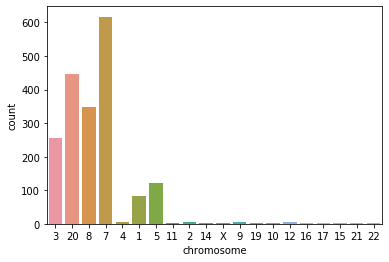

In [27]:
sns.countplot(x='chromosome', data=sig_genes_up_df)

In [28]:
sig_genes_down_df = chromosomes[chromosomes.gene.isin(sig_genes_down)]

In [29]:
print(sig_genes_down)

['AMELY', 'BPY2', 'BPY2B', 'BPY2C', 'CDY1', 'CDY1B', 'CDY2A', 'CDY2B', 'DAZ1', 'DAZ2', 'DAZ3', 'DAZ4', 'DDX3Y', 'EIF1AY', 'HSFY1', 'HSFY2', 'KDM5D', 'NLGN4Y', 'PCDH11Y', 'PRORY', 'PRY', 'PRY2', 'RBMY1A1', 'RBMY1B', 'RBMY1D', 'RBMY1E', 'RBMY1F', 'RBMY1J', 'RPS4Y1', 'RPS4Y2', 'SRY', 'TBL1Y', 'TGIF2LY', 'TMSB4Y', 'TSPY1', 'TSPY10', 'TSPY2', 'TSPY3', 'TSPY4', 'TSPY8', 'USP9Y', 'UTY', 'VCY', 'VCY1B', 'ZFY', 'A4GALT', 'ABCC2', 'ABCC4', 'ABCD4', 'ABHD12B', 'ABHD13', 'ABHD4', 'ABRACL', 'ACADSB', 'ACAT2', 'ACER2', 'ACIN1', 'ACO1', 'ACO2', 'ACOT1', 'ACOT2', 'ACOT4', 'ACOT6', 'ACR', 'ACSL5', 'ACTN1', 'ACTR10', 'ACTR1A', 'ACYP1', 'ADAM20', 'ADAM21', 'ADAMTSL1', 'ADAT2', 'ADCK1', 'ADCY4', 'ADD3', 'ADGB', 'ADGRG6', 'ADIRF', 'ADK', 'ADM2', 'ADORA2A', 'ADRA2A', 'ADRB1', 'ADSL', 'ADSSL1', 'AFAP1L2', 'AFDN', 'AGAP5', 'AGPAT4', 'AHI1', 'AHNAK2', 'AHSA1', 'AIG1', 'AJUBA', 'AK3', 'AK7', 'AK9', 'AKAP11', 'AKAP5', 'AKAP6', 'AKAP7', 'AKT1', 'AL359736.1', 'ALDH18A1', 'ALDH6A1', 'ALDH8A1', 'ALG11', 'ALG12', 'AL

In [30]:
sig_genes_down_df['chromosome'] = sig_genes_down_df['chromosome'].str.extract(pat='([0-9,X,Y]+)')

C:\Users\chels\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


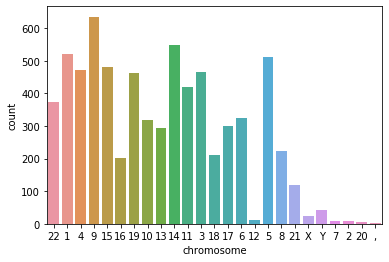

In [31]:
sns.countplot(x='chromosome', data=sig_genes_down_df)

In [32]:
print(sig_genes_up)

['ARHGEF2', 'C2CD4D', 'CTSK', 'CTSS', 'DAP3', 'ENSA', 'GOLPH3L', 'GON4L', 'HORMAD1', 'LAMTOR2', 'LINGO4', 'LMNA', 'MEX3A', 'MRPL9', 'RAB25', 'RIIAD1', 'RIT1', 'RORC', 'RXFP4', 'SEMA4A', 'SSR2', 'SYT11', 'TDRKH', 'THEM4', 'UBQLN4', 'AAR2', 'AASS', 'ABCA13', 'ABCB5', 'ABCB8', 'ABHD12', 'ABHD16B', 'ACHE', 'ACOT8', 'ACSS1', 'ACSS2', 'ACTL10', 'ACTL6B', 'ACTR3C', 'ACTR5', 'ADA', 'ADAM22', 'ADAM33', 'ADAP1', 'ADCK2', 'ADCY1', 'ADCYAP1R1', 'ADIG', 'ADNP', 'ADRA1D', 'ADRM1', 'AEBP1', 'AGBL3', 'AGFG2', 'AGK', 'AGMO', 'AGR2', 'AGR3', 'AHCY', 'AHCYL2', 'AHR', 'AIMP2', 'AKAP9', 'AKR1B1', 'AKR1B10', 'AKR1B15', 'AKR1D1', 'ALKBH4', 'AMPH', 'AMZ1', 'ANGPT4', 'ANKEF1', 'ANKIB1', 'ANKMY2', 'ANKRD61', 'ANKRD7', 'ANLN', 'AOAH', 'AOC1', 'AP1S1', 'AP4M1', 'AP5S1', 'APCDD1L', 'APMAP', 'AQP1', 'ARF5', 'ARFGAP1', 'ARFGEF2', 'ARFRP1', 'ARHGAP40', 'ARHGEF35', 'ARHGEF5', 'ARL4A', 'ARMC10', 'ARPC1A', 'ARPC1B', 'ASB15', 'ASB4', 'ASIC3', 'ASIP', 'ASNS', 'ASZ1', 'ATP6V0A4', 'ATP6V0E2', 'ATP9A', 'ATRN', 'ATXN7L1', 'AU

## Visualizations

In [33]:
luad_genes_up_in_list = [value for value in sig_genes_up if value in luad_sig_genes_up]
hnscc_genes_up_in_list = [value for value in sig_genes_up if value in hnscc_sig_genes_up]
ovarian_genes_up_in_list = [value for value in sig_genes_up if value in ovarian_sig_genes_up]
brca_genes_up_in_list = [value for value in sig_genes_up if value in brca_sig_genes_up]
gbm_genes_up_in_list = [value for value in sig_genes_up if value in gbm_sig_genes_up]
en_genes_up_in_list = [value for value in sig_genes_up if value in en_sig_genes_up]
lscc_genes_up_in_list = [value for value in sig_genes_up if value in lscc_sig_genes_up]
ccrcc_genes_up_in_list = [value for value in sig_genes_up if value in ccrcc_sig_genes_up]
colon_genes_up_in_list = [value for value in sig_genes_up if value in colon_sig_genes_up]

In [34]:
print('LUAD', len(luad_genes_up_in_list))
print('HSNCC', len(hnscc_genes_up_in_list))
print('OVARIAN', len(ovarian_genes_up_in_list))
print('BRCA', len(brca_genes_up_in_list))
print('GBM', len(gbm_genes_up_in_list))
print('ENDO', len(en_genes_up_in_list))
print('LSCC', len(lscc_genes_up_in_list))
print('CCRCC', len(ccrcc_genes_up_in_list))
print('COLON', len(colon_genes_up_in_list))

LUAD 794
HSNCC 918
OVARIAN 1539
BRCA 1937
GBM 1096
ENDO 25
LSCC 667
CCRCC 2
COLON 1542


## Plot on Chromosomes

In [35]:
import pyensembl
ensembl = pyensembl.EnsemblRelease()

In [36]:
ensembl.genes_by_name('ERBB2')

[Gene(gene_id='ENSG00000141736', gene_name='ERBB2', biotype='protein_coding', contig='17', start=39687914, end=39730426, strand='+', genome='GRCh38')]

In [180]:
def add_chromo_and_loc(my_dict, cancer):
    chromo = list()
    locations = list()
    not_found = list()
    count = 0
    for gene in list(my_dict.index.get_level_values(0)):
        count += 1
        try:
            e_gene = ensembl.genes_by_name(gene)
            chromo.append(e_gene[0].contig)
            locations.append((e_gene[0].start + e_gene[0].end)/2)
        except:
            not_found.append(gene)
            chromo.append(None)
            locations.append(None)
    my_dict['chromo'] = chromo
    my_dict['location'] = locations
    my_dict['cancer'] = cancer
    print(len(not_found)/count)
    return my_dict

In [181]:
luad_counts = add_chromo_and_loc(luad_counts, 'LUAD')
hnscc_counts = add_chromo_and_loc(hnscc_counts, 'HNSCC')
ovarian_counts = add_chromo_and_loc(ovarian_counts, 'OVARIAN')
gbm_counts = add_chromo_and_loc(gbm_counts, 'GBM')
lscc_counts = add_chromo_and_loc(lscc_counts, 'LSCC')

0.037577204546634144
0.019470286208123633
0.05881324318022849
0.016476616265635204
0.016476616265635204


In [182]:
colon_counts = add_chromo_and_loc(colon_counts, 'COLON')
brca_counts = add_chromo_and_loc(brca_counts, 'BRCA')
ccrcc_counts = add_chromo_and_loc(ccrcc_counts, 'CCRCC')
en_counts = add_chromo_and_loc(en_counts, 'ENDO')

0.1250645174097749
0.09678372446395407
0.03754213119004408
0.09352389777952026


In [171]:
# Get just chromosome 8
luad_counts_8 = luad_counts[luad_counts.chromo == '8']
hnscc_counts_8 = hnscc_counts[hnscc_counts.chromo == '8']
ovarian_counts_8 = ovarian_counts[ovarian_counts.chromo == '8']
colon_counts_8 = colon_counts[colon_counts.chromo == '8']
brca_counts_8 = brca_counts[brca_counts.chromo == '8']
gbm_counts_8 = gbm_counts[gbm_counts.chromo == '8']
lscc_counts_8 = lscc_counts[lscc_counts.chromo == '8']
ccrcc_counts_8 = ccrcc_counts[ccrcc_counts.chromo == '8']
en_counts_8 = en_counts[en_counts.chromo == '8']

In [41]:
# Format for graphs
luad_counts_8 = pd.melt(luad_counts_8, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])
hnscc_counts_8 = pd.melt(hnscc_counts_8, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])
ovarian_counts_8 = pd.melt(ovarian_counts_8, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])
colon_counts_8 = pd.melt(colon_counts_8, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])
brca_counts_8 = pd.melt(brca_counts_8, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])
gbm_counts_8 = pd.melt(gbm_counts_8, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])
lscc_counts_8 = pd.melt(lscc_counts_8, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])
ccrcc_counts_8 = pd.melt(ccrcc_counts_8, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])
en_counts_8 = pd.melt(en_counts_8, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])

In [42]:
frames = [luad_counts_8, hnscc_counts_8, ovarian_counts_8, colon_counts_8, brca_counts_8, gbm_counts_8, lscc_counts_8, ccrcc_counts_8, en_counts_8]

In [43]:
all_cancer_8 = pd.concat(frames)

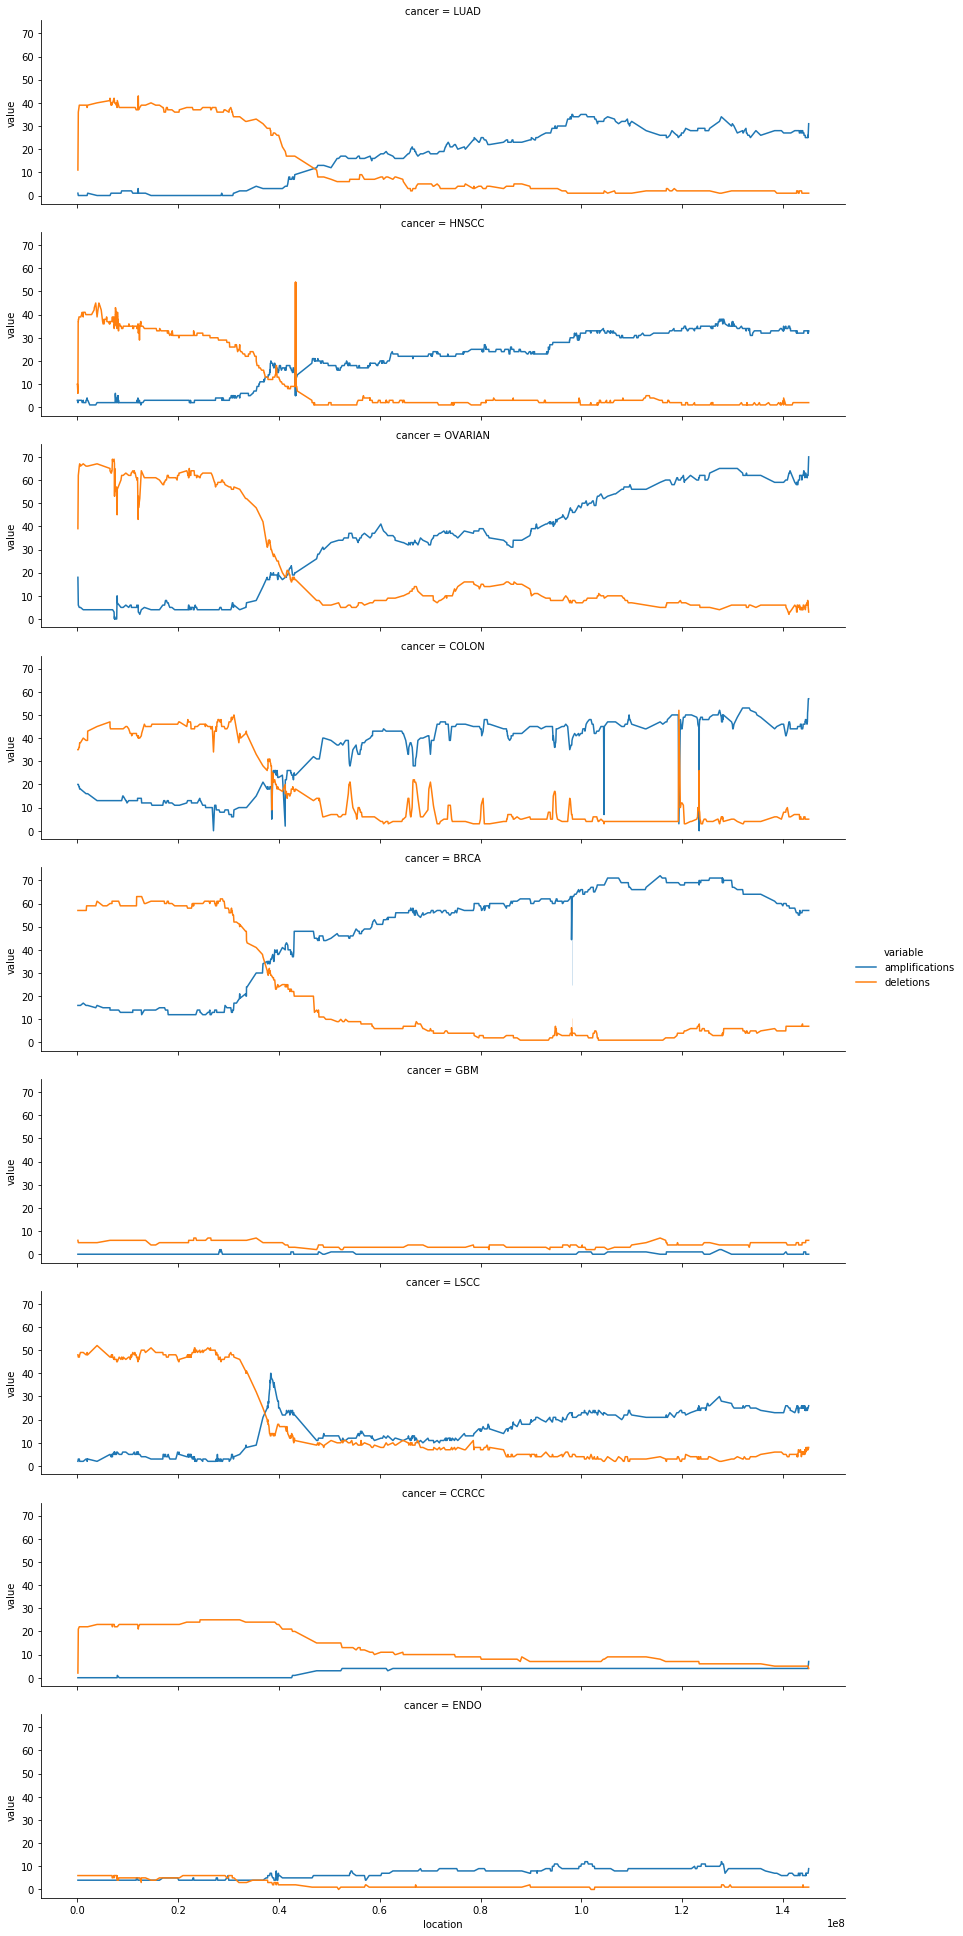

In [78]:
sns.relplot(x="location", y="value", height=3, aspect=4, hue="variable", row="cancer", kind="line", data=all_cancer_8)
plt.ylabel = "Number of Samples"

In [145]:
ideogram_data = pd.read_csv('NCBI_ideogram.csv')
chromo8 = ideogram_data[ideogram_data['#chromosome'] == '8']
colors = []
sections = list()
for index, row in chromo8.iterrows():
  sections.append((row['bp_start'], row['bp_stop']-row['bp_start']))
  if row['stain'] == 'gneg':
    colors.append('white')
  elif row['stain'] == 'gpos':
    if row['density'] == 25.0:
      colors.append('lightgray')
    elif row['density'] == 50.0:
      colors.append('gray')
    elif row['density'] == 75.0:
      colors.append('darkgray')
    else:
      colors.append('black')
  elif row['stain'] == 'acen':
    colors.append('red')
  else:
    colors.append('lightgray')

In [146]:
print(sections)

[(1, 2299999), (2300001, 3999999), (6300001, 6499999), (12800001, 6399999), (19200001, 4299999), (23500001, 3999999), (27500001, 1499999), (29000001, 7699999), (36700001, 1799999), (38500001, 1399999), (39900001, 3299999), (43200001, 1999999), (45200001, 1999999), (47200001, 4099999), (51300001, 399999), (51700001, 2899999), (54600001, 5999999), (60600001, 699999), (61300001, 3799999), (65100001, 1999999), (67100001, 2499999), (69600001, 2399999), (72000001, 2599999), (74600001, 99999), (74700001, 8799999), (83500001, 2399999), (85900001, 6399999), (92300001, 5599999), (97900001, 2599999), (100500001, 4599999), (105100001, 4399999), (109500001, 1599999), (111100001, 5599999), (116700001, 1599999), (118300001, 3199999), (121500001, 4799999), (126300001, 4099999), (130400001, 4999999), (135400001, 3499999), (138900001, 6238635)]


Text(0.07, 0.5, 'Number of Samples')

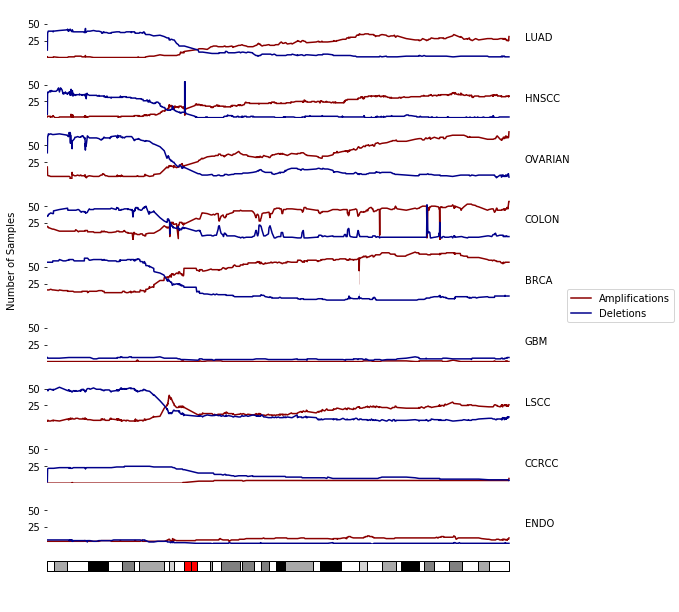

In [167]:
count = 0
fig, axs = plt.subplots(nrows=10, sharex=True, sharey=True, num=0, figsize=(10,11), )
plt.xlim(0,175138636)
plt.ylim(0, 75)
for frame in frames:
    axs[count].get_xaxis().set_visible(False)
    axs[count].set_yticks([25,50])
    axs[count].set_frame_on(False)
    axs[count].text(150000000, 25, frame.cancer[0])
    sns.lineplot(x="location", y="value", hue="variable", palette=['darkred', 'darkblue'], data=frame, ax=axs[count], legend=False)
    axs[count].set_ylabel("")
    count += 1
plt.broken_barh(sections, (50,15), facecolors=colors, edgecolor="black")
plt.axis('off')
fig.legend(labels=("Amplifications", "Deletions"), loc='center right')
fig.text(0.07, 0.5, "Number of Samples", rotation="vertical")

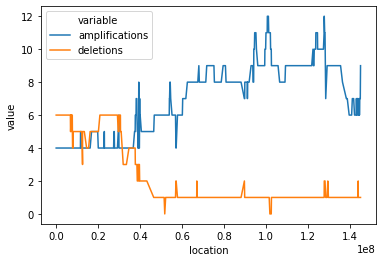

In [47]:
sns.lineplot(x="location", y="value", hue="variable", data=en_counts_8)

In [48]:
gbm_counts

,amplifications,neutral,deletions,average,chromo,location,cancer
Name,,,,,,,
A1BG,22.0,71.0,5.0,0.123574,19,58349335.0,GBM
A1CF,0.0,23.0,75.0,-0.447073,10,50842542.0,GBM
A2M,2.0,93.0,3.0,-0.004708,12,9091946.5,GBM
A2ML1,2.0,93.0,3.0,-0.004277,12,8854811.0,GBM
A3GALT2,2.0,90.0,6.0,-0.009638,1,33313932.0,GBM
...,...,...,...,...,...,...,...
ZXDC,1.0,92.0,5.0,-0.020824,3,126456746.0,GBM
ZYG11A,2.0,89.0,7.0,-0.013865,1,52868754.5,GBM
ZYG11B,2.0,89.0,7.0,-0.014392,1,52776894.5,GBM


In [49]:
# Looking at another chromosome
luad_counts_1 = luad_counts[luad_counts.chromo == '8']
hnscc_counts_1 = hnscc_counts[hnscc_counts.chromo == '8']
ovarian_counts_1 = ovarian_counts[ovarian_counts.chromo == '8']
colon_counts_1 = colon_counts[colon_counts.chromo == '8']
brca_counts_1 = brca_counts[brca_counts.chromo == '8']
gbm_counts_1 = gbm_counts[gbm_counts.chromo == '8']
lscc_counts_1 = lscc_counts[lscc_counts.chromo == '8']
ccrcc_counts_1 = ccrcc_counts[ccrcc_counts.chromo == '8']
en_counts_1 = en_counts[en_counts.chromo == '8']

In [50]:
# Format for graphs
luad_counts_1 = pd.melt(luad_counts_1, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])
hnscc_counts_1 = pd.melt(hnscc_counts_1, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])
ovarian_counts_1 = pd.melt(ovarian_counts_1, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])
colon_counts_1 = pd.melt(colon_counts_1, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])
brca_counts_1 = pd.melt(brca_counts_1, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])
gbm_counts_1 = pd.melt(gbm_counts_1, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])
lscc_counts_1 = pd.melt(lscc_counts_1, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])
ccrcc_counts_1 = pd.melt(ccrcc_counts_1, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])
en_counts_1 = pd.melt(en_counts_1, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])

In [51]:
frames = [luad_counts_1, hnscc_counts_1, ovarian_counts_1, colon_counts_1, brca_counts_1, gbm_counts_1, lscc_counts_1, ccrcc_counts_1, en_counts_1]
all_cancer_1 = pd.concat(frames)

C:\Users\chels\Anaconda3\lib\site-packages\seaborn\relational.py:1651: UserWarning: relplot is a figure-level function and does not accept target axes. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


AttributeError: 'PathCollection' object has no property 'type'

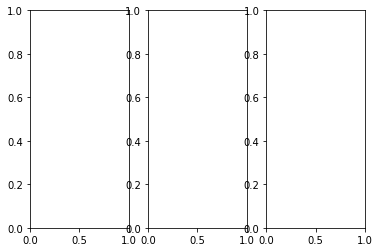

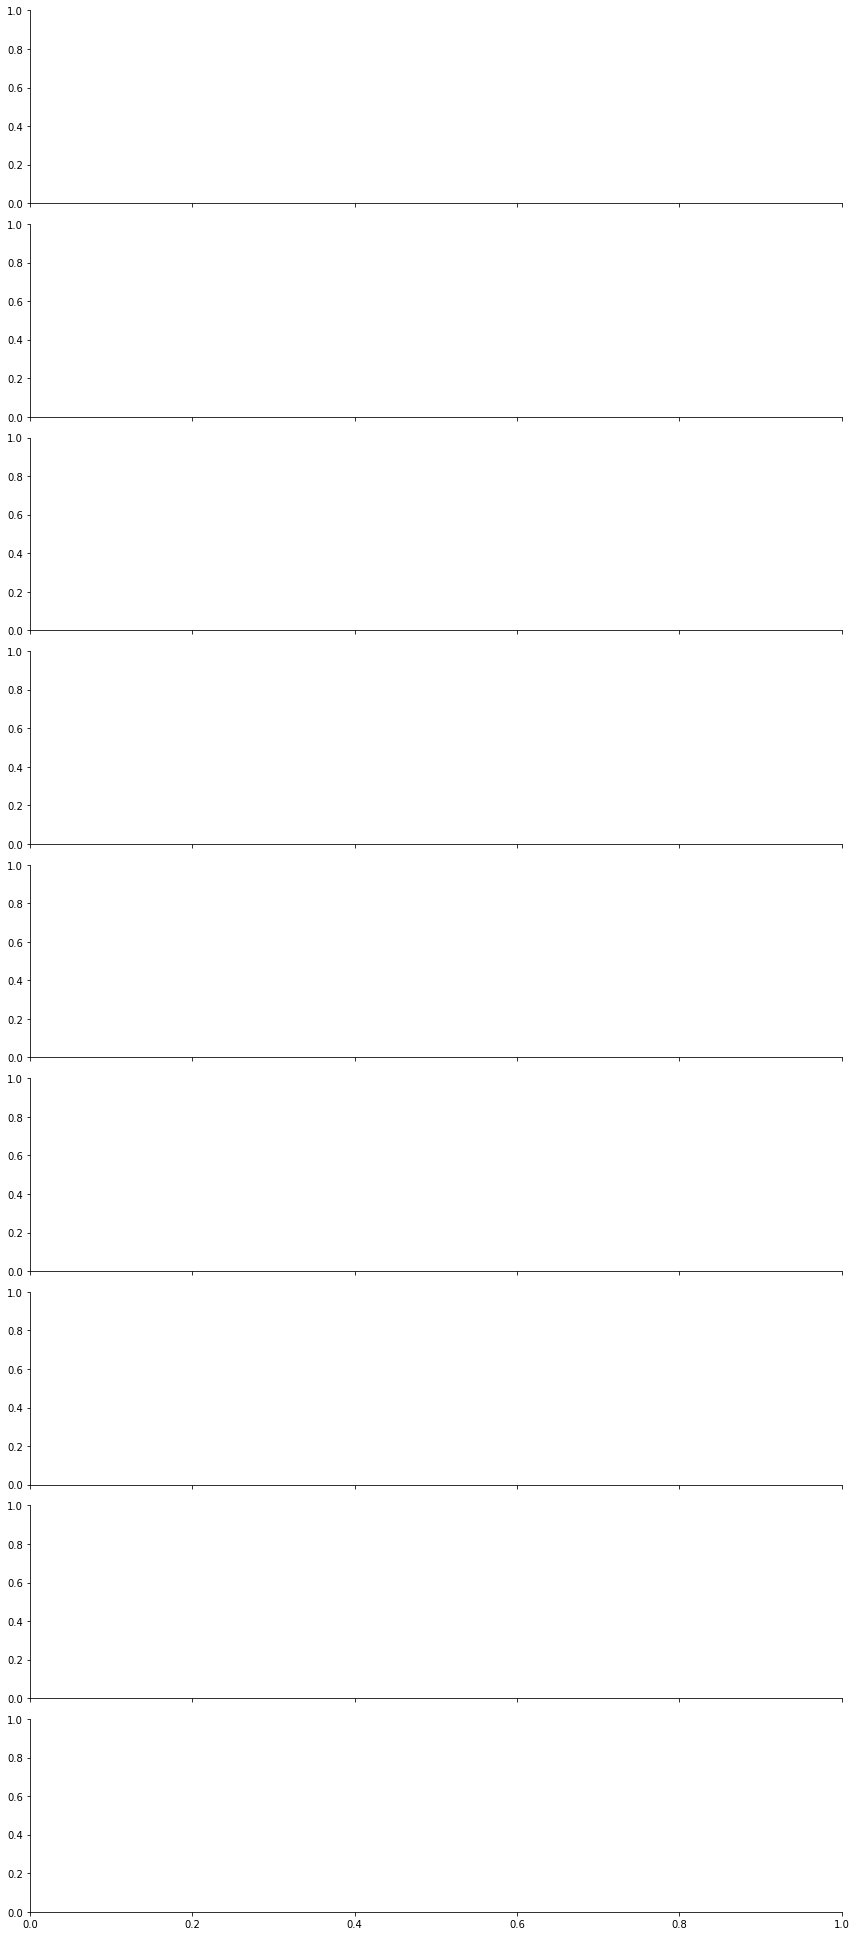

In [52]:
fig, axs = plt.subplots(ncols=3)
sns.relplot(x="location", y="value", height=3, aspect=4, hue="variable", row="cancer", type="lineplot", data=all_cancer_1, ax=axs[0])
plt.ylabel("Counts")

# Random Exploration

In [53]:
def add_chromo_loc(my_dict):
    chromo = list()
    locations = list()
    for gene in list(my_dict.index.get_level_values(0)):
        try:
            e_gene = ensembl.genes_by_name(gene)
            print(e_gene[0])
            chromo.append(e_gene[0].contig)
            locations.append((e_gene[0].start + e_gene[0].end)/2)
        except:
            chromo.append(None)
            locations.append(None)
    my_dict['chromo'] = chromo
    my_dict['location'] = locations
    return my_dict

In [54]:
add_chromo_loc(en_cnv.transpose())

Gene(gene_id='ENSG00000121410', gene_name='A1BG', biotype='protein_coding', contig='19', start=58345178, end=58353492, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000268895', gene_name='A1BG-AS1', biotype='lncRNA', contig='19', start=58347718, end=58355455, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000148584', gene_name='A1CF', biotype='protein_coding', contig='10', start=50799409, end=50885675, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000175899', gene_name='A2M', biotype='protein_coding', contig='12', start=9067664, end=9116229, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000245105', gene_name='A2M-AS1', biotype='lncRNA', contig='12', start=9065163, end=9068689, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000166535', gene_name='A2ML1', biotype='protein_coding', contig='12', start=8822621, end=8887001, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000256069', gene_name='A2MP1', biotype='transcribed_unprocessed_pseudogene', contig='12', start=9228533, en

Gene(gene_id='ENSG00000111348', gene_name='ARHGDIB', biotype='protein_coding', contig='12', start=14942031, end=14961728, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000242173', gene_name='ARHGDIG', biotype='protein_coding', contig='16', start=280450, end=283010, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000076928', gene_name='ARHGEF1', biotype='protein_coding', contig='19', start=41883161, end=41930150, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000104728', gene_name='ARHGEF10', biotype='protein_coding', contig='8', start=1823926, end=1958641, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000074964', gene_name='ARHGEF10L', biotype='protein_coding', contig='1', start=17539698, end=17697874, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000132694', gene_name='ARHGEF11', biotype='protein_coding', contig='1', start=156934840, end=157045370, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000196914', gene_name='ARHGEF12', biotype='protein_coding', contig='11', star

Gene(gene_id='ENSG00000144712', gene_name='CAND2', biotype='protein_coding', contig='3', start=12796472, end=12871916, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000171302', gene_name='CANT1', biotype='protein_coding', contig='17', start=78991716, end=79009867, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000127022', gene_name='CANX', biotype='protein_coding', contig='5', start=179678628, end=179731641, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000131236', gene_name='CAP1', biotype='protein_coding', contig='1', start=40040233, end=40072649, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000112186', gene_name='CAP2', biotype='protein_coding', contig='6', start=17393505, end=17557790, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000042493', gene_name='CAPG', biotype='protein_coding', contig='2', start=85394753, end=85418432, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000014216', gene_name='CAPN1', biotype='protein_coding', contig='11', start=65180566, end=652

Gene(gene_id='ENSG00000196739', gene_name='COL27A1', biotype='protein_coding', contig='9', start=114155537, end=114312511, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000215018', gene_name='COL28A1', biotype='protein_coding', contig='7', start=7356203, end=7535873, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000139219', gene_name='COL2A1', biotype='protein_coding', contig='12', start=47972967, end=48004554, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000168542', gene_name='COL3A1', biotype='protein_coding', contig='2', start=188974373, end=189012746, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000187498', gene_name='COL4A1', biotype='protein_coding', contig='13', start=110148963, end=110307157, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000134871', gene_name='COL4A2', biotype='protein_coding', contig='13', start=110305812, end=110513209, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000232814', gene_name='COL4A2-AS1', biotype='lncRNA', contig='13', start=11

Gene(gene_id='ENSG00000213221', gene_name='DNLZ', biotype='protein_coding', contig='9', start=136359480, end=136363744, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000106976', gene_name='DNM1', biotype='protein_coding', contig='9', start=128191655, end=128255248, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000087470', gene_name='DNM1L', biotype='protein_coding', contig='12', start=32679200, end=32745650, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000246877', gene_name='DNM1P35', biotype='lncRNA', contig='15', start=75727670, end=75738623, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000280038', gene_name='DNM1P41', biotype='TEC', contig='15', start=84166547, end=84169896, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000182397', gene_name='DNM1P46', biotype='transcribed_unprocessed_pseudogene', contig='15', start=99790156, end=99806927, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000259890', gene_name='DNM1P50', biotype='unprocessed_pseudogene', contig='15',

Gene(gene_id='ENSG00000129682', gene_name='FGF13', biotype='protein_coding', contig='X', start=138614727, end=139222777, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000226031', gene_name='FGF13-AS1', biotype='lncRNA', contig='X', start=138711452, end=138716617, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000102466', gene_name='FGF14', biotype='protein_coding', contig='13', start=101710804, end=102402457, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000234445', gene_name='FGF14-AS1', biotype='lncRNA', contig='13', start=102367539, end=102373666, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000272143', gene_name='FGF14-AS2', biotype='lncRNA', contig='13', start=102394630, end=102395703, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000243319', gene_name='FGF14-IT1', biotype='lncRNA', contig='13', start=102292327, end=102394519, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000196468', gene_name='FGF16', biotype='protein_coding', contig='X', start=77447389, end=774

Gene(gene_id='ENSG00000112855', gene_name='HARS2', biotype='protein_coding', contig='5', start=140691430, end=140699305, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000105509', gene_name='HAS1', biotype='protein_coding', contig='19', start=51713112, end=51723994, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000170961', gene_name='HAS2', biotype='protein_coding', contig='8', start=121612116, end=121641440, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000248690', gene_name='HAS2-AS1', biotype='lncRNA', contig='8', start=121639293, end=121994185, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000103044', gene_name='HAS3', biotype='protein_coding', contig='16', start=69105653, end=69118719, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000177602', gene_name='HASPIN', biotype='protein_coding', contig='17', start=3723903, end=3726699, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000128708', gene_name='HAT1', biotype='protein_coding', contig='2', start=171922448, end=171

Gene(gene_id='ENSG00000183783', gene_name='KCTD8', biotype='protein_coding', contig='4', start=44173903, end=44448809, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000104756', gene_name='KCTD9', biotype='protein_coding', contig='8', start=25427847, end=25458476, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000105438', gene_name='KDELR1', biotype='protein_coding', contig='19', start=48382575, end=48391551, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000136240', gene_name='KDELR2', biotype='protein_coding', contig='7', start=6445953, end=6484190, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000100196', gene_name='KDELR3', biotype='protein_coding', contig='22', start=38468078, end=38483447, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000175707', gene_name='KDF1', biotype='protein_coding', contig='1', start=26949562, end=26960468, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000004487', gene_name='KDM1A', biotype='protein_coding', contig='1', start=23019443, end=2

Gene(gene_id='ENSG00000261326', gene_name='LINC01355', biotype='lncRNA', contig='1', start=23281307, end=23287488, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000215866', gene_name='LINC01356', biotype='lncRNA', contig='1', start=112820170, end=112850643, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000237352', gene_name='LINC01358', biotype='lncRNA', contig='1', start=58933643, end=59240555, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000226891', gene_name='LINC01359', biotype='lncRNA', contig='1', start=64972225, end=65002489, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000233973', gene_name='LINC01360', biotype='lncRNA', contig='1', start=73305609, end=73355253, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000236268', gene_name='LINC01361', biotype='lncRNA', contig='1', start=82970820, end=82986208, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000230817', gene_name='LINC01362', biotype='lncRNA', contig='1', start=82903183, end=83166815, strand='+', genome=

Gene(gene_id='ENSG00000205791', gene_name='LOH12CR2', biotype='lncRNA', contig='12', start=12355406, end=12357067, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000196365', gene_name='LONP1', biotype='protein_coding', contig='19', start=5691834, end=5720572, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000102910', gene_name='LONP2', biotype='protein_coding', contig='16', start=48244300, end=48363122, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000154359', gene_name='LONRF1', biotype='protein_coding', contig='8', start=12721906, end=12756073, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000170500', gene_name='LONRF2', biotype='protein_coding', contig='2', start=100271875, end=100322501, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000175556', gene_name='LONRF3', biotype='protein_coding', contig='X', start=118974614, end=119018355, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000203782', gene_name='LOR', biotype='protein_coding', contig='1', start=153259687, end=1

Gene(gene_id='ENSG00000283222', gene_name='MIR4433A', biotype='miRNA', contig='2', start=64340759, end=64340839, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000264297', gene_name='MIR4433B', biotype='miRNA', contig='2', start=64340747, end=64340848, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000283204', gene_name='MIR4434', biotype='miRNA', contig='2', start=64525513, end=64525565, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000265507', gene_name='MIR4435-1', biotype='miRNA', contig='2', start=87629755, end=87629834, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000266139', gene_name='MIR4435-2', biotype='miRNA', contig='2', start=111321013, end=111321086, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000172965', gene_name='MIR4435-2HG', biotype='lncRNA', contig='2', start=111006015, end=111523376, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000265510', gene_name='MIR4436A', biotype='miRNA', contig='2', start=88812370, end=88812454, strand='+', genome='GRCh38

Gene(gene_id='ENSG00000166886', gene_name='NAB2', biotype='protein_coding', contig='12', start=57089043, end=57095476, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000173559', gene_name='NABP1', biotype='protein_coding', contig='2', start=191678068, end=191696664, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000139579', gene_name='NABP2', biotype='protein_coding', contig='12', start=56222015, end=56229854, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000196531', gene_name='NACA', biotype='protein_coding', contig='12', start=56712427, end=56731628, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000253506', gene_name='NACA2', biotype='protein_coding', contig='17', start=61590421, end=61591219, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000228224', gene_name='NACA4P', biotype='transcribed_processed_pseudogene', contig='8', start=101361794, end=101372707, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000136274', gene_name='NACAD', biotype='protein_coding', contig='7'

Gene(gene_id='ENSG00000179468', gene_name='OR9A2', biotype='protein_coding', contig='7', start=143026158, end=143027195, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000258083', gene_name='OR9A4', biotype='protein_coding', contig='7', start=141916399, end=141920625, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000174914', gene_name='OR9G1', biotype='protein_coding', contig='11', start=56699095, end=56703884, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000172457', gene_name='OR9G4', biotype='protein_coding', contig='11', start=56741223, end=56748697, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000172377', gene_name='OR9I1', biotype='protein_coding', contig='11', start=58116742, end=58125530, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000170605', gene_name='OR9K2', biotype='protein_coding', contig='12', start=55126406, end=55132750, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000186509', gene_name='OR9Q1', biotype='protein_coding', contig='11', start=58023881

Gene(gene_id='ENSG00000229571', gene_name='PRAMEF25', biotype='protein_coding', contig='1', start=13068677, end=13077884, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000280267', gene_name='PRAMEF26', biotype='protein_coding', contig='1', start=13148905, end=13155961, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000274764', gene_name='PRAMEF27', biotype='protein_coding', contig='1', start=13049476, end=13056491, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000237700', gene_name='PRAMEF33', biotype='protein_coding', contig='1', start=13303539, end=13308907, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000277862', gene_name='PRAMEF34P', biotype='unprocessed_pseudogene', contig='1', start=13095179, end=13097971, strand='-', genome='GRCh38')
Gene(gene_id='ENSG00000229978', gene_name='PRAMEF36P', biotype='transcribed_unprocessed_pseudogene', contig='1', start=13128818, end=13131615, strand='+', genome='GRCh38')
Gene(gene_id='ENSG00000243073', gene_name='PRAMEF4', biotype='pr

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Patient_ID,C3L-00006,C3L-00008,C3L-00032,C3L-00090,C3L-00098,C3L-00136,C3L-00137,C3L-00139,C3L-00143,C3L-00145,...,C3N-01346,C3N-01349,C3N-01510,C3N-01520,C3N-01521,C3N-01537,C3N-01802,C3N-01825,chromo,location
Name,,,,,,,,,,,,,,,,,,,,,
A1BG,0.00,0.01,0.01,-0.04,0.85,-0.10,-0.01,0.46,-0.02,0.00,...,0.75,0.08,-0.02,-0.04,-0.42,0.04,-0.08,0.05,19,58349335.0
A1BG-AS1,0.00,0.01,0.01,-0.04,0.85,-0.10,-0.01,0.46,-0.02,0.00,...,0.75,0.08,-0.02,-0.04,-0.42,0.04,-0.08,0.05,19,58351586.5
A1CF,-0.01,0.00,0.00,0.36,0.16,0.28,0.00,-0.11,-0.02,-0.01,...,0.05,-0.63,-0.01,-0.03,-0.10,0.01,-0.06,0.02,10,50842542.0
A2M,0.00,0.00,0.00,-0.05,-0.41,-0.11,0.01,-0.12,-0.03,0.00,...,0.08,0.14,-0.01,-0.03,-0.12,0.07,-0.13,0.08,12,9091946.5
A2M-AS1,0.00,0.00,0.00,-0.05,-0.41,-0.11,0.01,-0.12,-0.03,0.00,...,0.08,0.14,-0.01,-0.03,-0.12,0.07,-0.13,0.08,12,9066926.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.00,0.00,0.00,-0.05,-0.09,-0.12,0.01,-0.05,-0.02,0.03,...,0.08,0.14,-0.01,-0.03,0.26,-0.09,-0.12,0.02,1,52868754.5
ZYG11B,0.00,0.00,0.00,-0.05,-0.09,-0.12,0.01,-0.05,-0.02,0.03,...,0.08,0.14,-0.01,-0.03,0.26,-0.09,-0.12,0.02,1,52776894.5
ZYX,-0.01,0.00,0.01,-0.05,-0.10,0.29,0.01,-0.16,-0.03,0.05,...,0.06,0.51,-0.01,0.35,0.41,-0.01,-0.07,-0.06,7,143386203.0
